# General information
This project is based on the 'Titanic' dataset from Kaggle (https://www.kaggle.com/c/titanic/data)
This project includes data import, cleaning, visualization and logistic regressions.

In [122]:
# import of relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

## Import and cleaning

In [123]:
titanic = pd.read_csv('train.csv')

After importing the data, let's have a look at it by using some basic summaries such as head, info and describe

In [124]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [126]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



## Missing Data

In [127]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Using this table, we can see that most of the cabin data is missing, some of the age column is missing, and also 2 rows from the "Embarked" column.
Since so much of the cabin data is missing, the entire column would be removed from the data, along with the missing rows from "Embarked". 
The missing age data would be calculated using an imputation.

In [128]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.dropna(subset=['Embarked'],inplace=True)

To find what are the best variables to be based on when filling the age column, an analysis of age by different variables will be made.

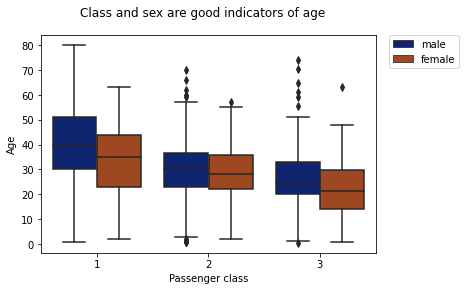

In [144]:
sns.boxplot(data=titanic,x='Pclass',hue='Sex',y='Age',palette = 'dark')
plt.suptitle("Class and sex are good indicators of age")
plt.xlabel(xlabel="Passenger class")
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)

It appears that higher class passenger tends to be older, and that in general men tend to be older than women.
Now I will add the new age data using the passenger class and sex.

In [146]:
#calculate the median for each intersection of class and sex
titanic.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [89]:
#if the Age data is missing, replace it with the values calculated before based on sex and passenger class.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):

        if (Pclass ==1) & (Sex == 'male'):
            return 40
        elif (Pclass ==1) & (Sex == 'female'):
            return 35
        elif (Pclass ==2) & (Sex == 'male'):
            return 30
        elif (Pclass ==2) & (Sex == 'female'):
            return 28
        elif (Pclass ==3) & (Sex == 'male'):
            return 25
        else:
            return 21.5
    else:
        return Age

In [90]:
titanic['Age'] = titanic[['Age','Pclass','Sex']].apply(impute_age,axis=1)

# Exploratory data analysis
now that the age column has been corrected, we can look at some interesting aspects of the data

<AxesSubplot:xlabel='Age', ylabel='Percent'>

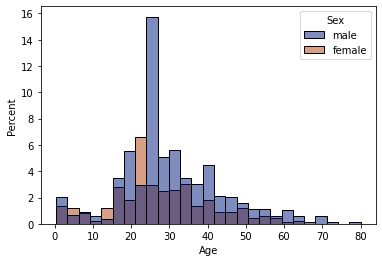

In [91]:
#age distribution
sns.histplot(data=titanic,x='Age',stat='percent',hue='Sex',palette='dark')

as we can see, a higher rate of the women survived, and also a lower rate of the lower class (3) didnt survive.

<AxesSubplot:xlabel='Survived', ylabel='count'>

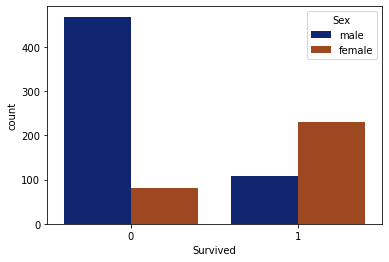

In [92]:
#survivors by sex
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='dark')

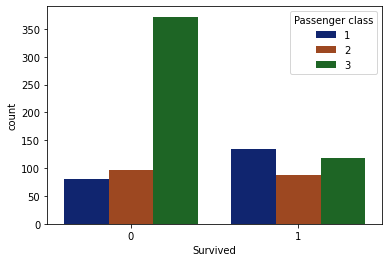

In [151]:
#survivors by class
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='dark')
plt.legend(title='Passenger class')

Text(0.5, 0, 'Amount of siblings onboard')

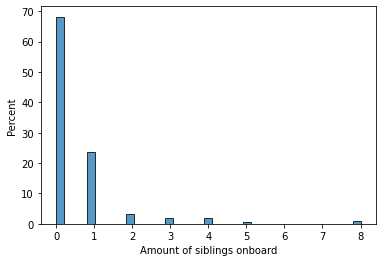

In [148]:
#most of the passengers came along, about 70%, and about 20% came with 1 other person, probably their spouse.
sns.histplot(data=titanic,x='SibSp',stat='percent')
plt.xlabel(xlabel="Amount of siblings onboard")

Text(0.5, 0, 'Amount of children/parents onboard')

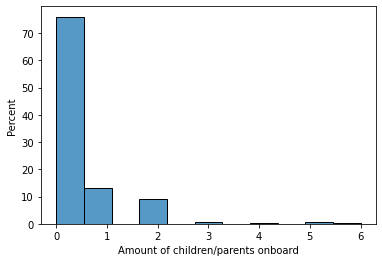

In [149]:
#similar to the siblings analysis, most of the passengers came without children
sns.histplot(data=titanic,x='Parch',stat='percent')
plt.xlabel(xlabel="Amount of children/parents onboard")

<AxesSubplot:xlabel='Embarked', ylabel='Percent'>

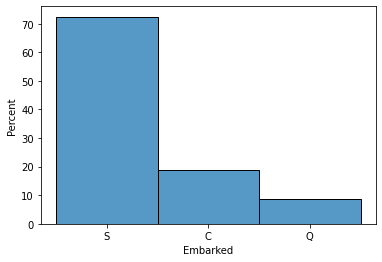

In [95]:
#most of the passengers (about 70%) embarked on Southampton, about 20% from Cherbourg and the rest from Queenstown
sns.histplot(data=titanic,x='Embarked',stat='percent')

## Converting Categorical Features 

Before running our logistic regression, we need to convert the non-numeric columns into dummy variables.
The two relevant columns are the 'sex' and 'embarked' columns. The 'Name' and 'Ticket' will not be used, therefore they will be removed.

In [103]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [104]:
titanic.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [105]:
titanic = pd.concat([titanic,sex,embark],axis=1)


# Building a Logistic Regression model

First we will be splitting our data into a training set and test set.
Then we will run the logistic model on the training set and compare our results with the test set.

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [115]:
from sklearn.linear_model import LogisticRegression

In [117]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Idan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

## Evaluation

using the predictions from the model, we will use a classification report comparing the predictions to the test data.

In [118]:
predictions = logmodel.predict(X_test)

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



Our initial model has 83% percision, 81% recall and 83% accuracy. considering the size of the data set along with the level of features used, this is a rather good model.